## **28. Salma Annissa Azizi (2141720137) / TI-3F**
**Ujian Tengah Semester - Machine Learning** </br> </br>

In [2]:
pip install opencv-python

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
import glob

In [4]:
img1 = []
for img in glob.glob("data/dummy/*"):
    n = cv2.imread(img)
    img1.append(n)

In [5]:
import cv2

def bgr_to_rgb(img1):
    # Mengonversi citra ke tipe data CV_8U
    img1_8u = cv2.convertScaleAbs(img1)

    # Menggunakan OpenCV untuk menukar kanal warna
    rgb_image = cv2.cvtColor(img1_8u, cv2.COLOR_BGR2RGB)
    return rgb_image

In [6]:
def scale_data(img): #
    h, w, ch= img.shape
    data = img / 255.0
    data = data.reshape(h * w, ch)
    return data

In [7]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

In [8]:
def img_comparison(original, new_colors):


    new_plate = new_colors.reshape(original.shape)
    fig, ax = plt.subplots(1, 2, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(wspace=0.05)
    ax[0].imshow(original)
    ax[0].set_title('Original Image', size=16)
    ax[1].imshow(new_plate)
    ax[1].set_title('2-color Image', size=16)

In [9]:
def kmeans_cluster(original):
    # Konversi citra BGR ke RGB
    original_rgb = bgr_to_rgb(original)

    data = scale_data(original_rgb)
    kmeans = MiniBatchKMeans(2, n_init=16)
    kmeans.fit(data)
    new_colors = kmeans.cluster_centers_[kmeans.predict(data)]
    Z = np.float32(data)
    #menentukan nilai k
    kriteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 1.0)
    k=2
    ret, label, center = cv2.kmeans(Z,k,None,kriteria,10,cv2.KMEANS_RANDOM_CENTERS)


    segmented_data = center[label.flatten()]
    segmented_image = segmented_data.reshape((original_rgb.shape))

    plot_pixels(data, colors=new_colors,title="Reduced color space: 16 colors")

    # Memanggil fungsi img_comparison dengan citra BGR dan citra hasil segmentasi
    img_comparison(original_rgb, segmented_image)

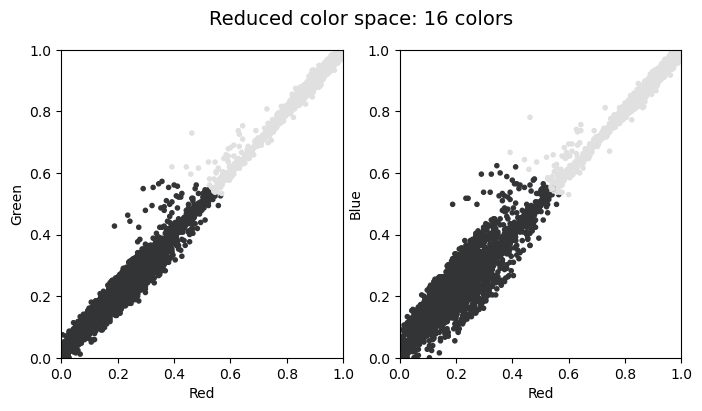

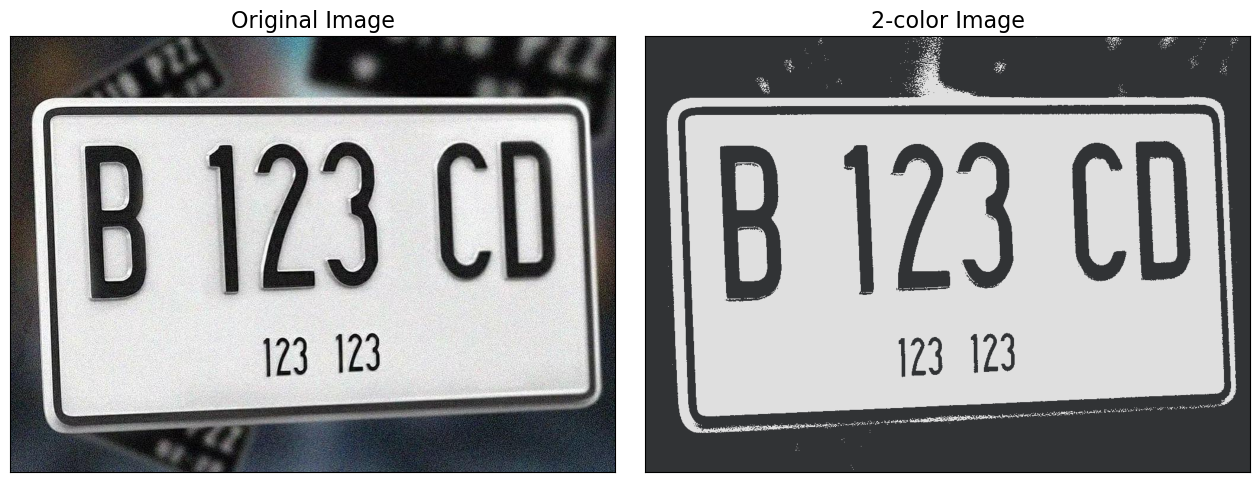

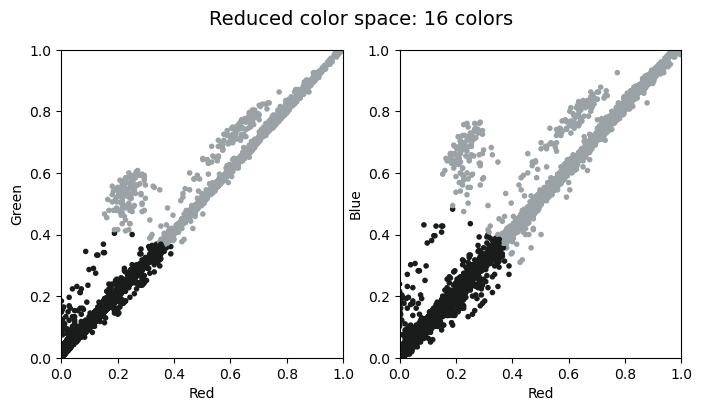

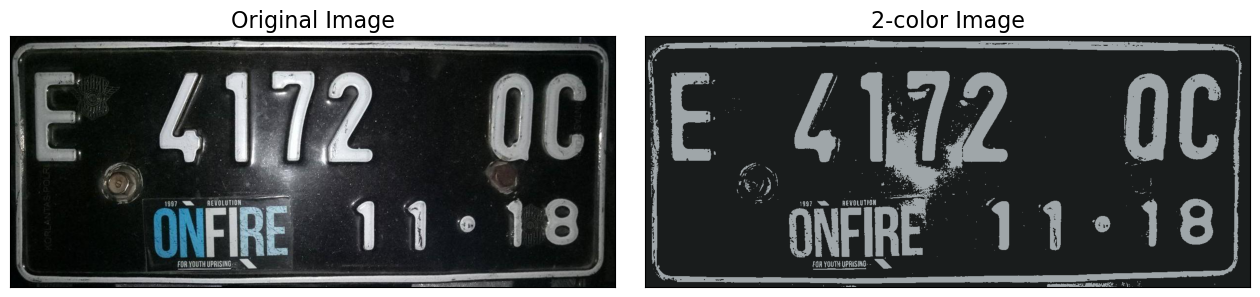

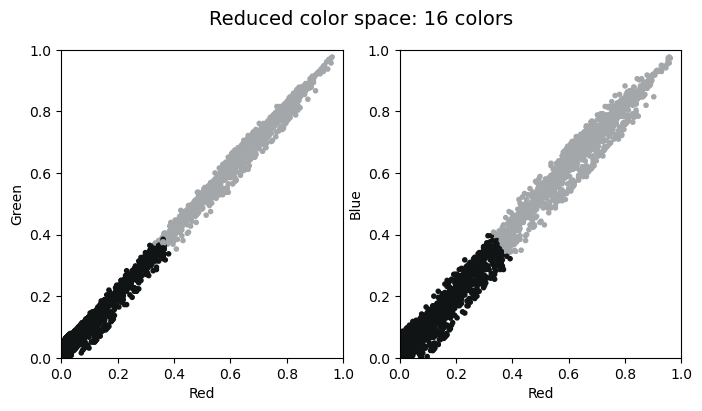

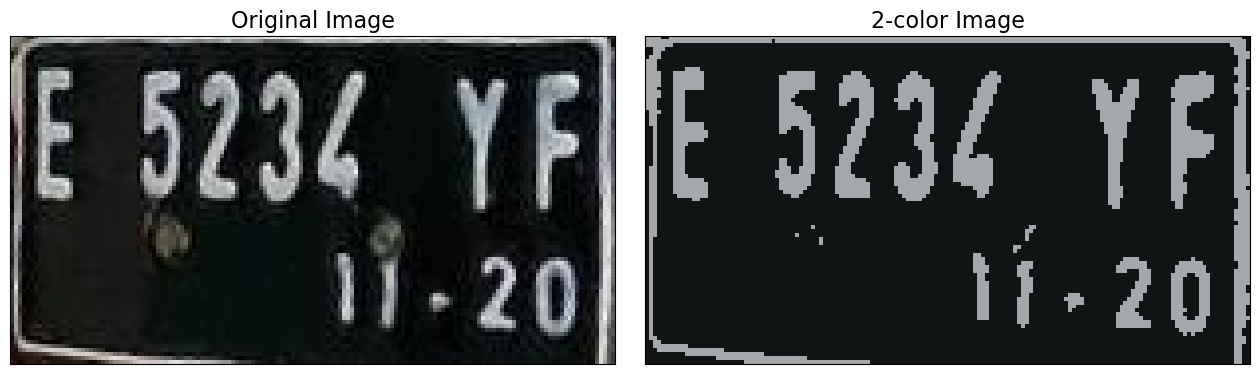

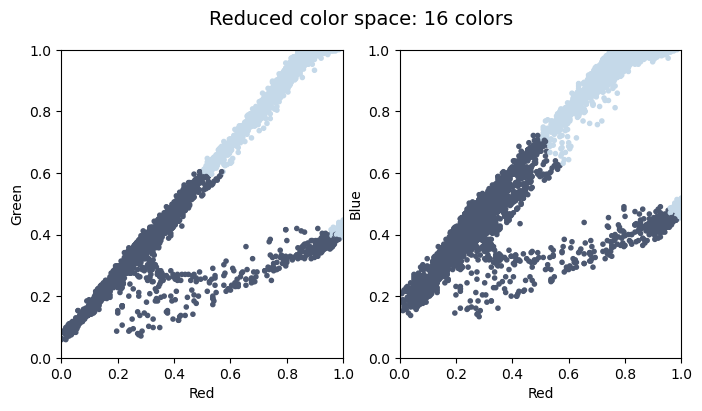

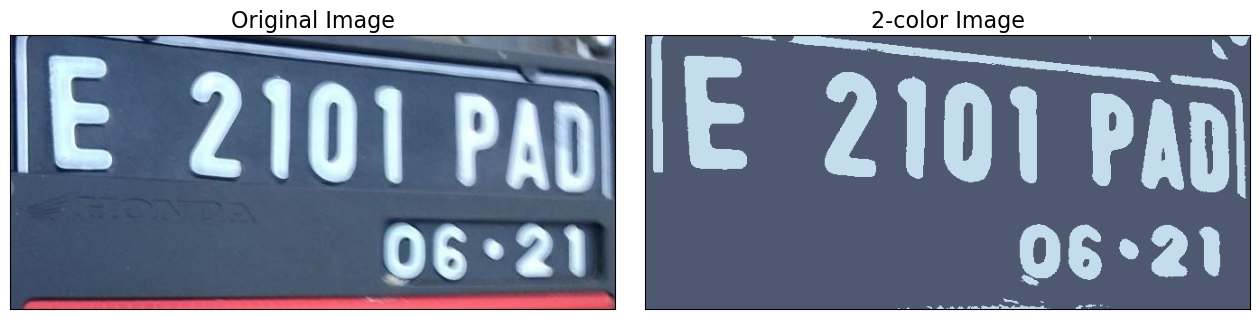

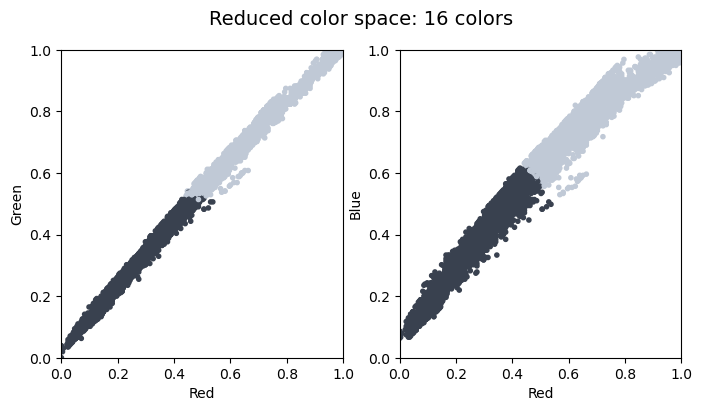

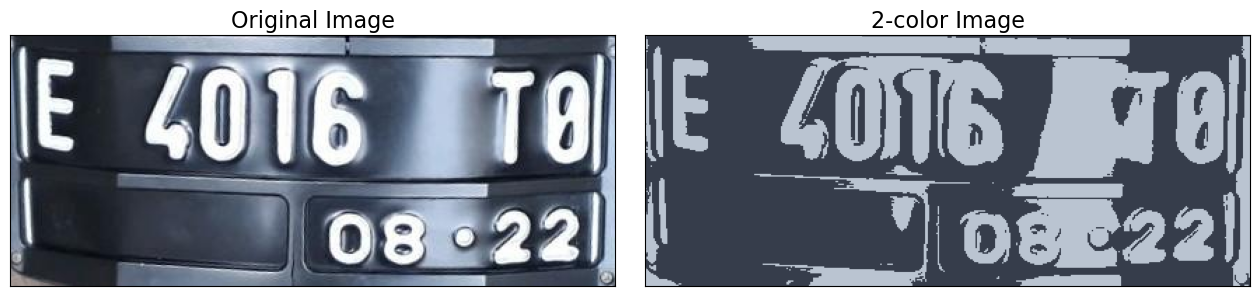

In [10]:
dataset = [0,1,2,3,4]
for data in dataset:
    kmeans_cluster(img1[data])